## Questão 1 

<b>a.Nome, descrição, volume de dados;</b>
<br><b>Nome</b>: Thoracic Surgery Data Data Set
<br><b>Descrição</b>: Os dados são dedicados ao problema de classificação relacionado à expectativa de vida pós-operatória nos pacientes com câncer de pulmão: classe 1 - morte dentro de um ano após a cirurgia, classe 2 - sobrevivência.
<br><b>Volume de dados</b>: 470

<b>b. Principais colunas e seus significados;</b>
<br>PRE7: Dor antes da cirurgia 
<br>PRE8: Hemoptise antes da cirurgia 
<br>PRE9: Dispneia antes da cirurgia 
<br>PRE10: Tosse antes da cirurgia 
<br>PRE11: Fraqueza antes da cirurgia
<br>PRE14: T no TNM clínico - tamanho do tumor original, de OC11 (menor) a OC14 (maior) (OC11, OC14, OC12, OC13) 
<br>PRE17: Tipo 2 DM - diabetes mellitus 
<br>PRE30: Fumar 
<br>PRE32: Asma 
<br>IDADE: Idade na cirurgia
<br>Risco1Y: período de sobrevivência de 1 ano

<b>c. Objetivo do dataset, qual o resultado esperado após os algoritmos</b>
<br>Os dados são dedicados ao problema de classificação relacionado à expectativa de vida pós-operatória nos pacientes com câncer de pulmão: classe 1 - morte dentro de um ano após a cirurgia, classe 2 - sobrevivência.
<br>O objetivo do algoritmo é verificar se a pessoa morreu ou sobreviveu 1 ano após a cirurgia

## 2) Análise dos dados:
<b>a. Tipos das colunas;</b>
<br>DGN: Diagnóstico - combinação específica de códigos ICD-10 para tumores primários e secundários, também múltiplos, se houver (String) 
<br>PRE4: Capacidade vital forçada - FVC (float) 
<br>PRE5: Volume que foi exalado no final do primeiro segundo de expiração forçada - FEV1 (float) 
<br>PRE6: Status do desempenho - Escala Zubrod (String) 
<br>PRE7: Dor antes da cirurgia (T, F) boolean
<br>PRE8: Hemoptise antes da cirurgia (T, F) boolean
<br>PRE9: Dispneia antes da cirurgia (T, F) boolean
<br>PRE10: Tosse antes da cirurgia (T, F) boolean
<br>PRE11: Fraqueza antes da cirurgia (T, F) boolean
<br>PRE14: T no TNM clínico - tamanho do tumor original, de OC11 (menor) a OC14 (maior) (OC11, OC14, OC12, OC13) (String)
<br>PRE17: Tipo 2 DM - diabetes mellitus (T, F) boolean
<br>PRE19: MI até 6 meses (T, F) boolean
<br>PRE25: PAD - doenças arteriais periféricas (T, F) boolean
<br>PRE30: Fumar (T , F) boolean
<br>PRE32: Asma (T, F) boolean
<br>IDADE: Idade na cirurgia (numérico) int
<br>Risco1Y: período de sobrevivência de 1 ano - (T) valor da rua se morto (T, F) boolean


<b>b. Campos nulos;</b>

In [345]:
import pandas as pd

In [346]:
train_df = pd.read_csv('dados.csv')
train_df.head(9)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
5,DGN3,2.48,1.88,PRZ1,F,F,F,T,F,OC11,F,F,F,F,F,51,F
6,DGN3,4.36,3.28,PRZ1,F,F,F,T,F,OC12,T,F,F,T,F,59,T
7,DGN2,3.19,2.50,PRZ1,F,F,F,T,F,OC11,F,F,T,T,F,66,T
8,DGN3,3.16,2.64,PRZ2,F,F,F,T,T,OC11,F,F,F,T,F,68,F


In [347]:
for field in train_df.columns:
   print(field, train_df[field].isnull().sum())

DGN 0
PRE4 0
PRE5 0
PRE6 0
PRE7 0
PRE8 0
PRE9 0
PRE10 0
PRE11 0
PRE14 0
PRE17 0
PRE19 0
PRE25 0
PRE30 0
PRE32 0
AGE 0
Risk1Yr 0


<b>c. Variáveis categóricas;</b>

DGN: Diagnóstico - combinação específica de códigos ICD-10 para tumores primários e secundários, também múltiplos, se houver (String)<br>
PRE6: Status do desempenho - Escala Zubrod (String)<br> 
PRE14: T no TNM clínico - tamanho do tumor original, de OC11 (menor) a OC14 (maior) (OC11, OC14, OC12, OC13) (String)

<b>d. Campos novos criados com justificativa;</b> Não foi criado nenhum campo

<b>e. Campos descartados com justificativa;</b> Campos floats

In [348]:
train_df = train_df.drop(['PRE4','PRE5'], 1)

<b>f. Conversões entre tipos de colunas;</b>

In [349]:
train_df['Risk1Yr'] = train_df['Risk1Yr'].map({'F':0, 'T':1,})

In [350]:
train_df['PRE11'] = train_df['PRE11'].map({'F':0, 'T':1,}) #Fraqueza antes da cirurgia

In [351]:
train_df['PRE6'] = train_df['PRE6'].map({'PRZ0':0, 'PRZ1':1, 'PRZ2':2, 'PRZ3':3, 'PRZ4': 4})
train_df['PRE14'] = train_df['PRE14'].map({'OC11':0, 'OC12':1, 'OC13':2, 'OC14':3})

for number in ['7', '8', '9', '10', '17', '19', '25', '30', '32']:
    column = "PRE%s" % number
    train_df[column] = train_df[column].map({'F':0, 'T':1,})
    


<b>g. Apresente alguma técnica de análise não apresentada em sala até o momento;</b>

<b>h. Analise, com APIs específicas, pelo menos 3 características relevantes dodataset e exiba gráficos a respeito.</b>

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

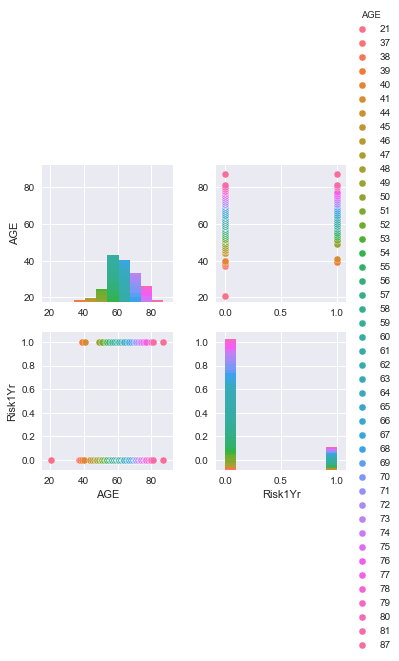

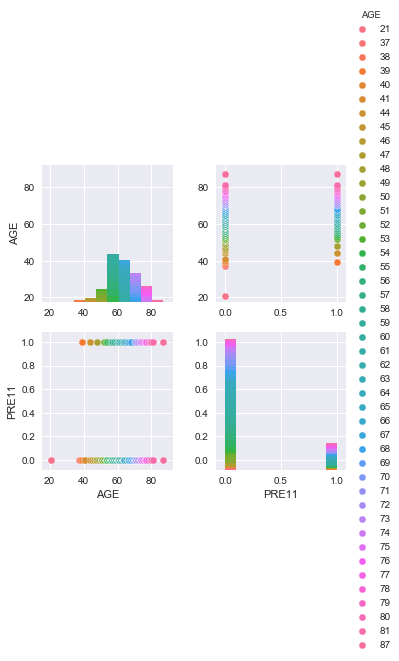

In [358]:
age = sns.pairplot(train_df, hue="AGE",vars=["AGE", "Risk1Yr"]);
age = sns.pairplot(train_df, hue="AGE",vars=["AGE", "PRE11"]);

## 3) Execução dos algoritmos:

<b>a. Listagem dos algoritmos aplicáveis;</b>

MultinomialNB, AdaBoostClassifier, OneVsOne, OneVsRest, RandomForestClassifier

<b>b. Escolha pelo menos um algoritmo ainda não visto na disciplina;</b>

BernoulliNB

<b>c. Configuração/parametrização dos algoritmos;</b>

In [354]:
dump_data = train_df[['DGN','PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE']]
dump_answers = train_df['Risk1Yr']

# variáveis categóricas
data = pd.get_dummies(dump_data).values
answers = dump_answers.values

#definição de treino, teste e validação
porcentagem_de_treino = 0.8
porcentagem_de_teste = 0.1

tamanho_de_treino = int(porcentagem_de_treino * len(answers))
tamanho_de_teste = int(porcentagem_de_teste * len(answers))
tamanho_de_validacao = len(answers) - tamanho_de_treino - tamanho_de_teste

treino_dados = data[:tamanho_de_treino]
treino_marcacoes = answers[:tamanho_de_treino]

fim_de_treino = tamanho_de_treino + tamanho_de_teste

teste_dados = data[tamanho_de_treino:fim_de_treino]
teste_marcacoes = answers[tamanho_de_treino:fim_de_treino]

validacao_dados = data[fim_de_treino:]
validacao_marcacoes = answers[fim_de_treino:]

def fit_and_predict(nome,modelo,treino_dados, treino_marcacoes,teste_dados, teste_marcacoes):
    modelo.fit(treino_dados, treino_marcacoes)
    resultado = modelo.predict(teste_dados)

    #print(resultado)
    # print(teste_marcacoes)

    acertos = 0
    tamanho = len(teste_marcacoes)
    for i in range(tamanho):
        if teste_marcacoes[i] == resultado[i]:
            acertos = acertos + 1

    print('%s: %.2f' % (nome, (acertos * 100/ tamanho)))

In [355]:
train_df.head(3)

,DGN,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,DGN3,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,DGN3,1,0,0,0,1,0,0,0,0,0,1,0,59,0


<b>d. Uso de k-folding;</b>

In [356]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

modeloMultinomial = MultinomialNB()
modeloAdaBoost = AdaBoostClassifier()
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))
modeloRandomForest = RandomForestClassifier()
modeloBernoulli = BernoulliNB()

fit_and_predict("MultinomialNB", modeloMultinomial, treino_dados,treino_marcacoes, teste_dados, teste_marcacoes)

fit_and_predict("AdaBoostClassifier", modeloAdaBoost, treino_dados,treino_marcacoes, teste_dados, teste_marcacoes)

resultadoOneVsRest = fit_and_predict("OneVsRest", modeloOneVsRest,treino_dados, treino_marcacoes,teste_dados, teste_marcacoes)

resultadoOneVsOne = fit_and_predict("OneVsOne", modeloOneVsOne,treino_dados, treino_marcacoes,teste_dados, teste_marcacoes)

fit_and_predict("RandomForest", modeloRandomForest, treino_dados,treino_marcacoes, teste_dados, teste_marcacoes)

fit_and_predict("Bernoulli", modeloBernoulli, treino_dados,treino_marcacoes, teste_dados, teste_marcacoes)


print('------K_folding------')
def k_folding(k, nome, modelo, treino_dados, treino_marcacoes):
    scores = cross_val_score(modelo,treino_dados,treino_marcacoes,cv = k)
    print("%s %.2f" %(nome,(np.mean(scores)*100.0)))

k_folding(6, "MultinomialNB",modeloMultinomial, treino_dados, treino_marcacoes)
k_folding(6, "AdaBoost",modeloAdaBoost, treino_dados, treino_marcacoes)
k_folding(6, "OneVsRest",modeloOneVsRest, treino_dados, treino_marcacoes)
k_folding(6, "OneVsOne",modeloOneVsOne, treino_dados, treino_marcacoes)
k_folding(6, "RandomForest",modeloRandomForest, treino_dados, treino_marcacoes)
k_folding(6, "Bernoulli",modeloBernoulli, treino_dados, treino_marcacoes)

MultinomialNB: 87.23
AdaBoostClassifier: 82.98
OneVsRest: 87.23
OneVsOne: 87.23
RandomForest: 85.11
Bernoulli: 87.23
------K_folding------
MultinomialNB 82.20
AdaBoost 79.79
OneVsRest 83.52
OneVsOne 83.52
RandomForest 76.33
Bernoulli 80.61


<b>e. Algoritmos que não se aplicam ao dataset;</b>

<b>f. Tamanho dos dados de treino, teste e validação.</b>

treino = 336 - 80%
<br>teste = 42 - 10%
<br>valdiacao = 42 - 10%

## 4) Apresentação dos resultados:

<b>a. Crie gráficos para comparar a performance dos algoritmos;</b>

<b>b. Justifique os resultados</b>